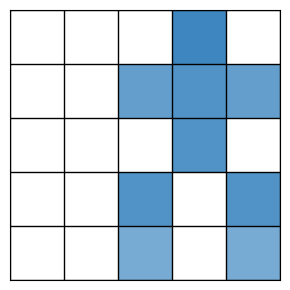

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 数据矩阵 ──
human1 = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
])

# ── 2. 连续渐变色图 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

# ── 3. 绘制 ──
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(human1, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')  # ★ 关键：vmin/vmax

# 网格线与刻度设置保持原样
ax.set_xticks(np.arange(human1.shape[1]))
ax.set_yticks(np.arange(human1.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, human1.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, human1.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

# ax.set_title('human1')
plt.tight_layout()
plt.savefig("1.png")
plt.show()


# 将矩阵非零0像素，整体向左平移一个像素

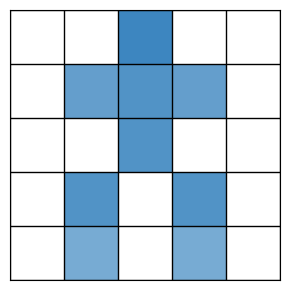

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 原始矩阵 ──
human1 = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
])

# ── 2. 非零像素整体左移 ──
shifted = np.zeros_like(human1)
# 找到所有非零元素的坐标
rows, cols = np.where(human1 != 0)
for r, c in zip(rows, cols):
    if c - 1 >= 0:
        shifted[r, c-1] = human1[r, c]  #左移
    #if c + 1 < human1.shape[1]:
        #shifted[r, c+1] = human1[r, c]   #右移
# 右边新空出的列自动为0

# ── 3. 连续渐变色图 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

# ── 4. 绘制 ──
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(shifted, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

# 保持网格线和刻度设置不变
ax.set_xticks(np.arange(shifted.shape[1]))
ax.set_yticks(np.arange(shifted.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, shifted.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, shifted.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

# ax.set_title('shifted human1')
plt.tight_layout()
plt.savefig("2.png")
plt.show()


# 先上移再右移

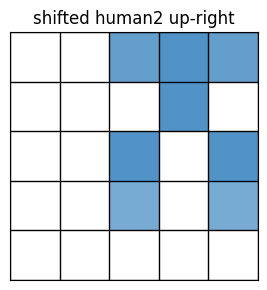

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 原始矩阵 ──
human1 = np.array([
    [0, 0, 9, 0, 0],
    [0, 7, 8, 7, 0],
    [0, 0, 8, 0, 0],
    [0, 8, 0, 8, 0],
    [0, 6, 0, 6, 0]
])

# ── 2. 非零像素整体右上角平移 ──
shifted = np.zeros_like(human1)
rows, cols = np.where(human1 != 0)
for r, c in zip(rows, cols):
    new_r = r - 1  # 上移
    new_c = c + 1  # 右移
    # 边界检查
    if new_r >= 0 and new_c < human1.shape[1]:
        shifted[new_r, new_c] = human1[r, c]
# 其他位置保持为0

# ── 3. 配色与绘图 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(shifted, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

ax.set_xticks(np.arange(shifted.shape[1]))
ax.set_yticks(np.arange(shifted.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, shifted.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, shifted.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

ax.set_title('shifted human1 up-right')
plt.tight_layout()
plt.show()


# 上述矩阵的数值是公式$$\Delta I_{DS} = \kappa \cdot \exp\left[-\left(\frac{t}{\tau}\right)^\beta \right]$$中的I_DS的值，其中kappa=8   tau=1.704 beta=1 T= 0.5 。矩阵非0像素值经过一个时间步长，由上述公式得到衰减后的像素值

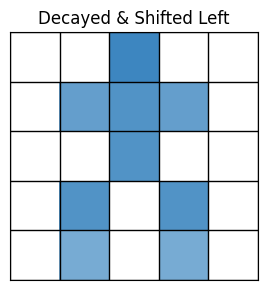

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 原始矩阵 ──
human1 = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
], dtype=float)
# ── 2. 参数与衰减因子 ──
tau   = 1.704
beta  = 1.0
T     = 0.5
decay_factor = np.exp(-(T/tau)**beta)

# ── 3. 计算衰减后矩阵 ──
human1_decayed = np.where(human1>0,
                          human1 * decay_factor,
                          0.0)

# ── 4. 左移一个像素 ──
# 方法一：矩阵整体平移（丢弃最左列，右侧补 0）
human1_shifted = np.zeros_like(human1)
human1_shifted[:, :-1] = human1[:, 1:]

# ── 5. 可视化 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(human1_shifted, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

ax.set_xticks(np.arange(human1_shifted.shape[1]))
ax.set_yticks(np.arange(human1_shifted.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, human1_shifted.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, human1_shifted.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

ax.set_title('Decayed & Shifted Left')
plt.tight_layout()
plt.show()


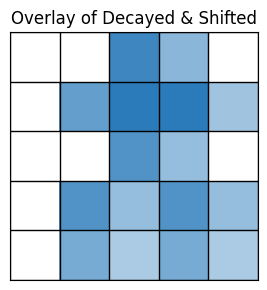

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 原始矩阵 ──
human1 = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
], dtype=float)

# ── 2. 衰减矩阵 ──
tau, beta, T = 1.704, 1.0, 1
decay_factor = np.exp(-(T/tau)**beta)
human1_decayed = np.where(human1>0, human1 * decay_factor, 0.0)

# ── 3. 左移矩阵 ──
human1_shifted = np.zeros_like(human1)
human1_shifted[:, :-1] = human1[:, 1:]

# ── 4. 叠加 ──
decayed_f = human1_decayed.astype(np.float32)
shifted_f = human1_shifted.astype(np.float32)
overlay = cv2.addWeighted(decayed_f, 1.0, shifted_f, 1.0, 0.0)

# ── 5. 可视化 Overlay ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(overlay, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

ax.set_xticks(np.arange(overlay.shape[1]))
ax.set_yticks(np.arange(overlay.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, overlay.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, overlay.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

ax.set_title('Overlay of Decayed & Shifted')
plt.tight_layout()
plt.savefig('Overlay of Decayed & Shifted')
plt.show()


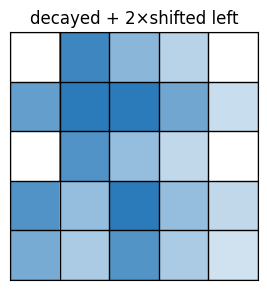

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ── 1. 原始矩阵 ──
human1 = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
], dtype=float)

# ── 2. 指数衰减矩阵 ──
tau, beta, T = 1.704, 1.0, 1      # ← T=2 s
decay_factor  = np.exp(-(T/tau)**beta)
human1_decayed = np.where(human1 > 0, human1 * decay_factor, 0.0)

# ── 3. 左移 1 列 → human1_shifted ──
human1_shifted = np.zeros_like(human1)
human1_shifted[:, :-1] = human1[:, 1:]

# ── 4. human1_decayed 与 human1_shifted 叠加 → overlay ──
overlay = cv2.addWeighted(human1_decayed.astype(np.float32), 1.0,
                          human1_shifted.astype(np.float32),   1.0, 0.0)

# ── 5. 再左移 1 列 → human1_shifted2 ──
human1_shifted2 = np.zeros_like(human1_shifted)
human1_shifted2[:, :-1] = human1_shifted[:, 1:]

# ── 6. 对 overlay 再做一次指数衰减 → overlay_decayed ──
overlay_decayed = np.where(overlay > 0, overlay * decay_factor, 0.0).astype(np.float32)

# ── 7. overlay_decayed 与 human1_shifted2 叠加 → final_overlay ──
final_overlay = cv2.addWeighted(overlay_decayed, 1.0,
                                human1_shifted2.astype(np.float32), 1.0, 0.0)

# ── 8. 可视化 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(final_overlay, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

ax.set_xticks(np.arange(final_overlay.shape[1]))
ax.set_yticks(np.arange(final_overlay.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_xticks(np.arange(-.5, final_overlay.shape[1] , 1), minor=True)
ax.set_yticks(np.arange(-.5, final_overlay.shape[0] , 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

ax.set_title('decayed + 2×shifted left')
plt.tight_layout()
plt.savefig('decayed + 2×shifted left')
plt.show()


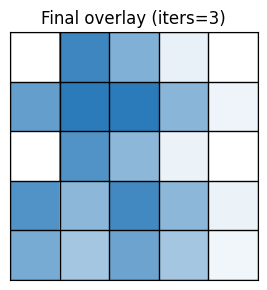

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def decay_matrix(mat, tau, beta, T):
    """对 mat 中非零元素做一次指数衰减."""
    decay_factor = np.exp(-(T / tau) ** beta)
    return np.where(mat > 0, mat * decay_factor, 0.0)

def shift_left(mat, shift_pixels=1):
    """整体左移 shift_pixels 个像素，右侧补 0."""
    res = np.zeros_like(mat)
    if shift_pixels < mat.shape[1]:
        res[:, :-shift_pixels] = mat[:, shift_pixels:]
    # 若 shift_pixels ≥ 宽度，全部变 0
    return res

def iterate_overlay(mat_init, tau, beta, T,
                    shift_pixels=1,
                    alpha=1.0, beta_w=1.0,
                    num_iters=2):
    """
    连续进行 num_iters 轮：
        1) 指数衰减
        2) 左移 shift_pixels 个像素
        3) addWeighted 叠加
    返回最终矩阵。
    """
    mat = mat_init.astype(np.float32)

    for _ in range(num_iters):
        decayed = decay_matrix(mat, tau, beta, T).astype(np.float32)
        shifted = shift_left(mat, shift_pixels).astype(np.float32)
        mat = cv2.addWeighted(decayed, alpha, shifted, beta_w, 0.0)

    return mat

# ── 输入矩阵 ──
human = np.array([
    [0, 0, 0, 9, 0],
    [0, 0, 7, 8, 7],
    [0, 0, 0, 8, 0],
    [0, 0, 8, 0, 8],
    [0, 0, 6, 0, 6]
], dtype=float)

# ── 运行示例 ──
tau, beta, T = 1.704, 1.0, 2      # 衰减参数
final = iterate_overlay(
    mat_init=human,
    tau=tau, beta=beta, T=T,
    shift_pixels=1,               # 每轮左移 1 列
    alpha=1.0, beta_w=1.0,        # 叠加权重
    num_iters=2                   # 迭代 2 轮
)

# ── 可视化 ──
colors = ['#FFFFFF', '#ABCBE4', '#6BA3CF', '#2B7BBA']
cmap   = mcolors.LinearSegmentedColormap.from_list('custom_blues', colors)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(final, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')

ax.set_xticks(np.arange(final.shape[1]))
ax.set_yticks(np.arange(final.shape[0]))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax.set_xticks(np.arange(-.5, final.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, final.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False)

ax.set_title(f'Final overlay (iters={3})')
plt.tight_layout()
plt.show()


# 将上述灰度图代替human矩阵，图像非0灰度整体向左平移并与灰度衰减图像叠加，重复上述过程

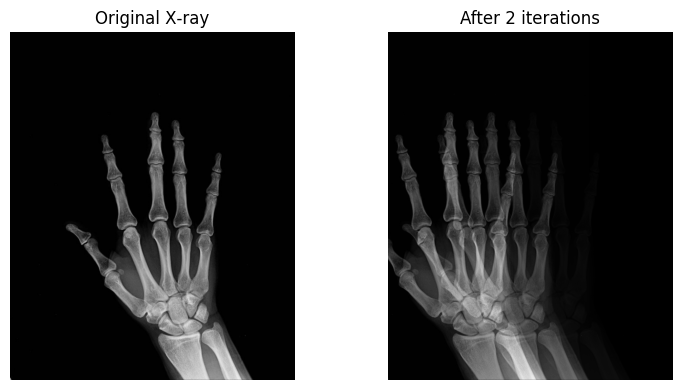

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def decay_matrix(mat, tau, beta, T):
    decay_factor = np.exp(-(T / tau) ** beta)
    return np.where(mat > 0, mat * decay_factor, 0.0)

def shift_left(mat, shift_pixels=1):
    res = np.zeros_like(mat)
    if shift_pixels < mat.shape[1]:
        res[:, :-shift_pixels] = mat[:, shift_pixels:]
    return res

def iterate_overlay(mat_init, tau, beta, T,
                    shift_pixels=100,
                    alpha=1.0, beta_w=1.0,
                    num_iters=3):
    mat = mat_init.astype(np.float32)
    for _ in range(num_iters):
        decayed = decay_matrix(mat, tau, beta, T).astype(np.float32)
        shifted = shift_left(mat, shift_pixels).astype(np.float32)
        mat = cv2.addWeighted(decayed, alpha, shifted, beta_w, 0.0)
    return mat

# Load the X‑ray image
img_path = "hand.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
assert img_gray is not None, "Image not found"

# Apply iterative overlay
tau, beta, T = 1.704, 1.0, 2
iters = 2
result_img = iterate_overlay(img_gray, tau, beta, T,
                             shift_pixels=120,
                             alpha=1.0, beta_w=1.0,
                             num_iters=iters)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original X‑ray")
axes[0].axis('off')

axes[1].imshow(result_img, cmap='gray')
axes[1].set_title(f"After {iters} iterations")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("result_hand.png")
plt.show()


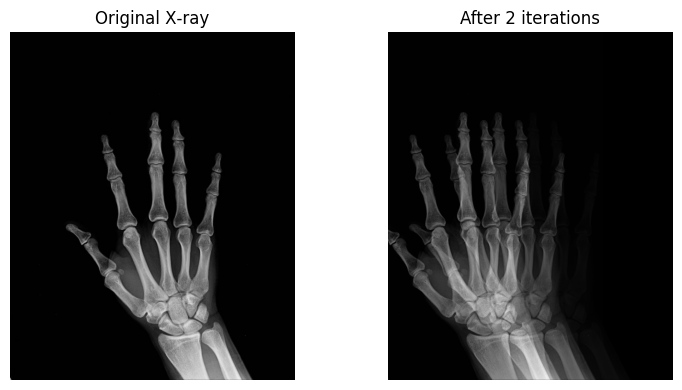

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def decay_matrix(mat, tau, beta, T):
    decay_factor = np.exp(-(T / tau) ** beta)
    return np.where(mat > 0, mat * decay_factor, 0.0)

def shift_left(mat, shift_pixels=1):
    res = np.zeros_like(mat)
    if shift_pixels < mat.shape[1]:
        res[:, :-shift_pixels] = mat[:, shift_pixels:]
    return res

def iterate_overlay(mat_init, tau, beta, T,
                    shift_pixels=100,
                    alpha=1.0, beta_w=1.0,
                    num_iters=3):
    mat = mat_init.astype(np.float32)
    for _ in range(num_iters):
        decayed = decay_matrix(mat, tau, beta, T).astype(np.float32)
        shifted = shift_left(mat, shift_pixels).astype(np.float32)
        mat = cv2.addWeighted(decayed, alpha, shifted, beta_w, 0.0)
    return mat

# Load the X‑ray image
img_path = "hand.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
assert img_gray is not None, "Image not found"

# Apply iterative overlay
tau, beta, T = 1.704, 1.0, 2
iters = 2
result_img = iterate_overlay(img_gray, tau, beta, T,
                             shift_pixels=100,
                             alpha=1.0, beta_w=1.0,
                             num_iters=iters)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original X‑ray")
axes[0].axis('off')

axes[1].imshow(result_img, cmap='gray')
axes[1].set_title(f"After {iters} iterations")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("shift_hand.png")
plt.show()


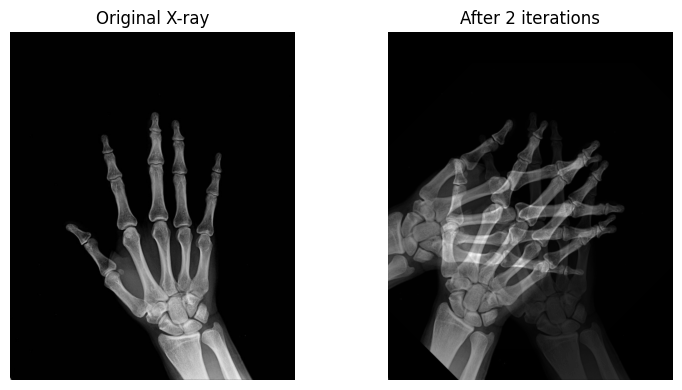

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def decay_matrix(mat, tau, beta, T):
    decay_factor = np.exp(-(T / tau) ** beta)
    return np.where(mat > 0, mat * decay_factor, 0.0)

# --- 新增：旋转函数（取代平移） -----------------------------
def rotate(mat, angle_deg=3):
    """顺时针旋转 angle_deg°，保持原尺寸。"""
    h, w = mat.shape[:2]
    M = cv2.getRotationMatrix2D(center=(w // 2, h // 2),
                                angle=-angle_deg,  # 负角度=顺时针
                                scale=1.0)
    return cv2.warpAffine(mat, M, (w, h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0)
# ----------------------------------------------------------

def iterate_overlay(mat_init, tau, beta, T,
                    angle_deg=3,              
                    alpha=1.0, beta_w=1.0,
                    num_iters=3):
    mat = mat_init.astype(np.float32)
    for _ in range(num_iters):
        decayed  = decay_matrix(mat, tau, beta, T).astype(np.float32)
        rotated  = rotate(mat, angle_deg).astype(np.float32)
        mat = cv2.addWeighted(decayed, alpha, rotated, beta_w, 0.0)
    return mat

# -------------------------- 主程序保持不变 --------------------------
img_path = "hand.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
assert img_gray is not None, "Image not found"

tau, beta, T = 1.704, 1.0, 1
iters = 2
result_img = iterate_overlay(img_gray, tau, beta, T,
                             angle_deg=45,       
                             alpha=1.0, beta_w=1.0,
                             num_iters=iters)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_gray, cmap='gray'); axes[0].set_title("Original X-ray"); axes[0].axis('off')
axes[1].imshow(result_img, cmap='gray'); axes[1].set_title(f"After {iters} iterations"); axes[1].axis('off')
plt.tight_layout(); plt.savefig("rotate_hand.png"); plt.show()


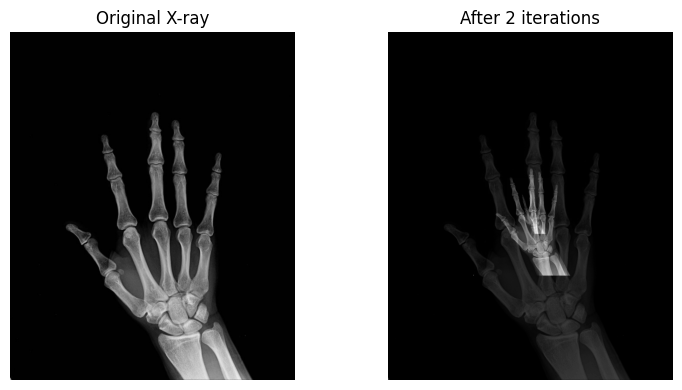

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def decay_matrix(mat, tau, beta, T):
    decay_factor = np.exp(-(T / tau) ** beta)
    return np.where(mat > 0, mat * decay_factor, 0.0)

# --- 新增：缩放函数（代替平移） ------------------------------
def scale(mat, scale_factor=0.9):
    """
    按 scale_factor 缩放图像，保持整体居中（原中心不变），
    画布大小与原图一致，多余区域填 0。
    """
    h, w = mat.shape[:2]
    # 1. 缩放
    scaled = cv2.resize(mat, None,
                        fx=scale_factor, fy=scale_factor,
                        interpolation=cv2.INTER_LINEAR)
    h_s, w_s = scaled.shape[:2]

    # 2. 创建同尺寸画布
    canvas = np.zeros_like(mat)

    # 3. 计算左上角偏移，使缩放图中心与原图中心重合
    y_off = (h - h_s) // 2
    x_off = (w - w_s) // 2

    # 4. 贴回画布（居中）
    canvas[y_off:y_off + h_s, x_off:x_off + w_s] = scaled
    return canvas
# -----------------------------------------------------------

def iterate_overlay(mat_init, tau, beta, T,
                    scale_factor=0.9,        # ← 用缩放因子替代 shift_pixels
                    alpha=1.0, beta_w=1.0,
                    num_iters=3):
    mat = mat_init.astype(np.float32)
    for _ in range(num_iters):
        decayed = decay_matrix(mat, tau, beta, T).astype(np.float32)
        scaled  = scale(mat, scale_factor).astype(np.float32)
        mat = cv2.addWeighted(decayed, alpha, scaled, beta_w, 0.0)
    return mat

# ------------------------- 主程序不变 -------------------------
img_path = "hand.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
assert img_gray is not None, "Image not found"

tau, beta, T = 1.704, 1.0, 0.5
iters = 2
result_img = iterate_overlay(img_gray, tau, beta, T,
                             scale_factor=0.4,   
                             alpha=1.0, beta_w=1.0,
                             num_iters=iters)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_gray, cmap='gray'); axes[0].set_title("Original X-ray"); axes[0].axis('off')
axes[1].imshow(result_img, cmap='gray'); axes[1].set_title(f"After {iters} iterations"); axes[1].axis('off')
plt.tight_layout(); plt.savefig("resize_hand.png"); plt.show()
